# JAI RAJ 
# TASK 6
# PREDICTION USING DECISION TREE
# GRIP TSF 

## IMPORTING IMPORTANT LIBRARY

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score
from sklearn import datasets
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

## READING OUR DATASET

In [70]:
data=pd.read_csv("Iris.csv")

## SEEING THE DATASET

In [71]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## WE NEED TO CLEAN OUR DATASET. WE NEED TO PERFORM FOLLOWING TASKS.
### a) REMOVE NULL VALUES
### b) CHANGE THE INDEX TO ID
### c) WE CAN DECODE OUR CATEGORICAL DATA IN 'SPECIES' COLUMN TO SOME NUMERICAL FEATURE

### a) REMOVING ANY ROW THAT CONTAINS THE NULL VALUE IN ANY COLUMN.WE CAN ALSO FILL THE NULL VALUE WITH SOME DATA BY INTERPOLATION OR BY FILLING SOME STATISTICAL PARAMETER LIKE MEAN,MEDIAN or MODE.

In [72]:
data= data.dropna()

## LET US AGAIN SEE OUR DATA NOW

In [73]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## SO WE CAN SEE THAT OUR DATA DOES NOT CONTAIN NULL VALUE

## b) WE WILL CHANGE OUR INDEX TO ID

In [74]:
data.set_index("Id")

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


## c) NOW WE CAN DECODE OUR CATEGORICAL DATA IN 'SPECIES' COLUMN TO SOME NUMERICAL FEATURE AND REMOVE Species COLUMN

In [75]:
labelencoder = LabelEncoder()
data['Species_category'] = labelencoder.fit_transform(data['Species'])
data=data.drop(["Species"],axis= 1)
data




,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_category
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


## SO WE HAVE SEEN OUR SPECIES COLUMN IS NOW CONVERTED INTO CATEGORY DATA i.e. 0 for 'Iris-setosa', 1 for iris-versicolor and 2 for 'Iris-virginica'.
## SO WE HAVE CLEANED OUR DATA AND CAN FURTHER MOVE TO DATA SPLITING AND TRAINING PART, BUT BEFORE THAT LET US ANALYSE OUR DATASET THROUGH SOME PLOT.

## FIRST LET US SEE THE IMPORTANT STATISTICAL PARAMETER OF OUR DATASET

In [124]:
# SEEING SOME STATISTICAL FEATURE OF DATA
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_category
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


## NOW WE WILL SCATTER PLOT EACH COLUMN WITH RESPECT TO CATEGORY 

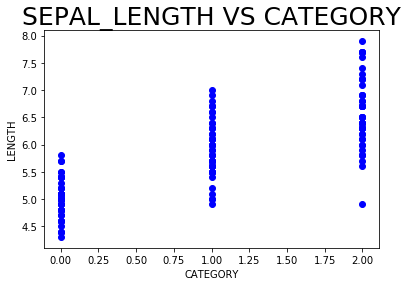

In [129]:
Y= np.array(data.SepalLengthCm)
X= np.array(data.Species_category)
plt.scatter(X, Y, c="blue")
plt.title("SEPAL_LENGTH VS CATEGORY", fontsize=25)
plt.xlabel("CATEGORY")
plt.ylabel("LENGTH")
plt.show()

## SO IN ABOVE PLOT WE CAN SEE HIGHER THE CATEGORY, MORE IS THE SEPAL_ LENGTH BUT STILL THERE ARE SOME COMMON POINT IN MORE THAN ONE CATEGORY.

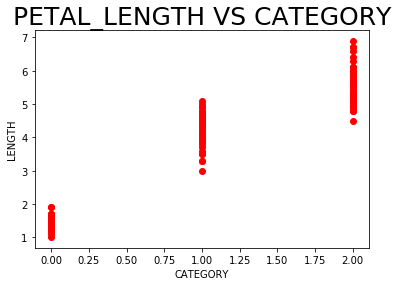

In [130]:
Y= np.array(data.PetalLengthCm)
X= np.array(data.Species_category)
plt.scatter(X, Y, c="red")
plt.title("PETAL_LENGTH VS CATEGORY", fontsize=25)
plt.xlabel("CATEGORY")
plt.ylabel("LENGTH")
plt.show()

## AGAIN IN ABOVE PLOT WE CAN SEE MORE THE LENGTH OF PETAL ,HIGHER WOULD BE THE CATEGORY

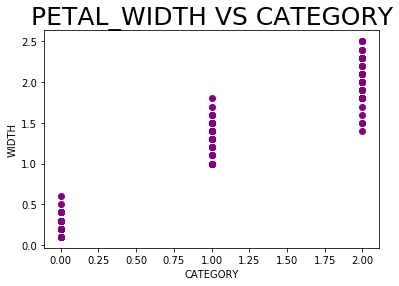

In [131]:
Y= np.array(data.PetalWidthCm)
X= np.array(data.Species_category)
plt.scatter(X, Y, c="purple")
plt.title("PETAL_WIDTH VS CATEGORY", fontsize=25)
plt.xlabel("CATEGORY")
plt.ylabel("WIDTH")
plt.show()

## AGAIN IN ABOVE GRAPH WE CAN SEE HIGHER THE WIDTH OF PETAL,HIGHER WILL BE THE CATEGORY, BUT AGAIN THERE IS MANY OVERLAPPING POINTS

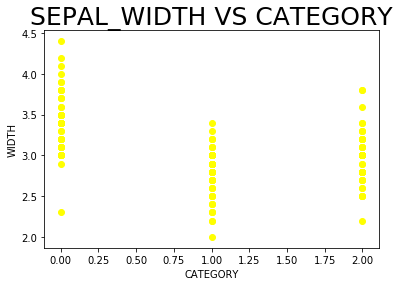

In [132]:
Y= np.array(data.SepalWidthCm)
X= np.array(data.Species_category)
plt.scatter(X, Y, c="yellow")
plt.title("SEPAL_WIDTH VS CATEGORY", fontsize=25)
plt.xlabel("CATEGORY")
plt.ylabel("WIDTH")
plt.show()

## IN THE ABOVE GRAPH OF SEPAL_WIDTH, THERE IS NO FIX TREND AS WIDTH DECREASE TILL CATEGORY IS 2 THEN AGAIN IT INCREASES

## NOW WE WILL SPLIT OUR DATA IN TWO PARTS TRAIN AND TEST AND FUTHER WE WILL CREATE X_LABEL AND Y_LABEL

In [81]:
train, test = train_test_split(data, test_size=0.2)
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X_train= train[features]
Y_train= train.Species_category
X_test=  test[features]
Y_test=  test.Species_category

# PLOTTING THE COUNT OF TRAIN DATA

0: 39   1: 42   2: 39


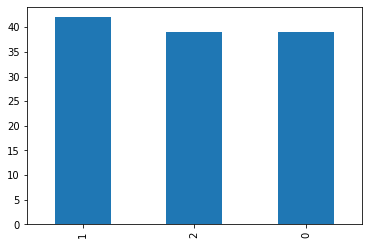

In [82]:
a=list(Y_train.value_counts())
print("0:",a[2]," ","1:",a[0]," ","2:",a[1])
Y_train.value_counts().plot(kind='bar')

# PLOTTING COUNT OF TEST DATA

0: 11   1: 11   2: 8


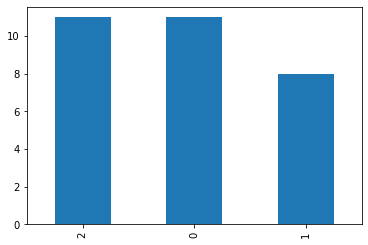

In [112]:
a=list(Y_test.value_counts())
print("0:",a[0]," ","1:",a[1]," ","2:",a[2])
Y_test.value_counts().plot(kind='bar')

# CREATING A DECISION TREE MODEL AND FITTING ON TRAIN DATA

In [113]:
clf = DecisionTreeClassifier(max_depth=6)
clf = clf.fit(X_train, Y_train)

# PLOTTING THE NODES AND LEAF OF DECISION TREE

                             DECISION TREE PATH                 
x[0]:Sepallengthcm
x[1]:SepalWidthcm
x[2]:Petallengthcm
x[3]:PetalWidthcm


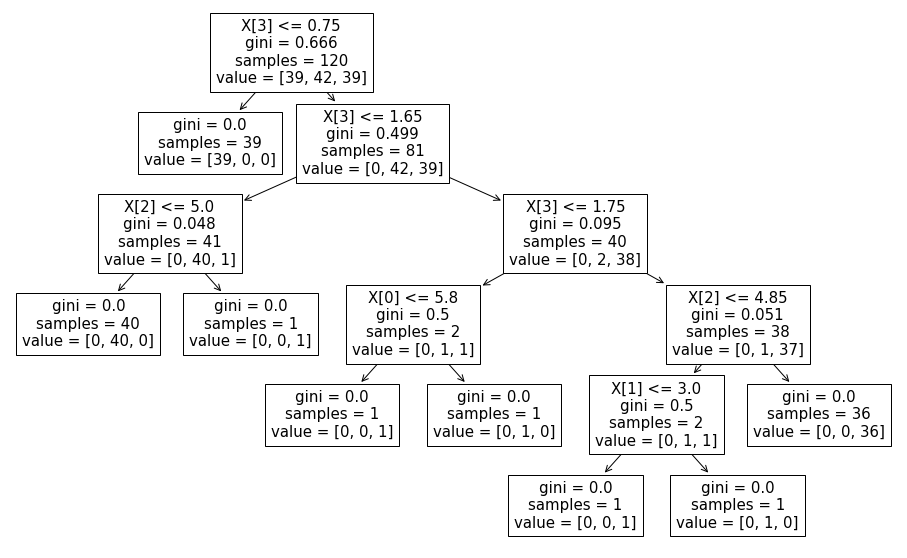

In [119]:
print("\033[1m" + "                             DECISION TREE PATH                 " "\033[0m")
print("\033[1m" +"x[0]:Sepallengthcm"+"\033[0m")
print("\033[1m" +"x[1]:SepalWidthcm"+"\033[0m")
print("\033[1m" +"x[2]:Petallengthcm" + "\033[0m")
print("\033[1m" +"x[3]:PetalWidthcm"+ "\033[0m")
plt.figure(figsize=(16,10))
tree.plot_tree(clf)
plt.show()


# FINDING THE ACCURACY OF MODEL

In [120]:
predictions=clf.predict(X_test)
print("Accuracy", metrics.accuracy_score(Y_test, predictions))


Accuracy 0.9333333333333333


# ANALYSING THE CLASSIFICATION REPORT. WE CAN SEE FOR CLASS 1 PRECISION,RECALL and f1-score IS LOWER THAN OTHER CLASS. CLASS 0 WAS BEST IN TERMS OF ALL THREE ACCURACY METRICES.

In [122]:
classification_report_actual = classification_report(Y_test, predictions)
print("\033[1m"+classification_report_actual, sep ='\n'+"\033[0m")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      0.88      0.88         8
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



# PLOTTING THE CLASSIFICATION REPORT FOR BETTER UNDERSTANDING

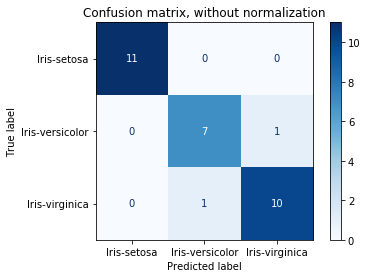

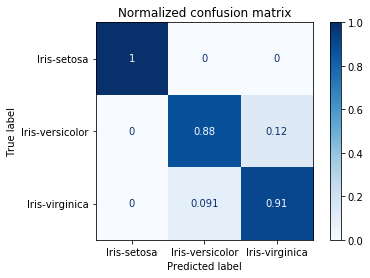

In [123]:
class_names=[ 'Iris-setosa','Iris-versicolor','Iris-virginica']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = metrics.plot_confusion_matrix(clf, X_test, Y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
plt.show()

## NOW WE WILL PLOT ROC-AUC CURVE FOR BETTER ANALYSIS OF CLASSIFIER. ALTHOUGH AUC CURVE IS ONLY MADE FOR BINARY PROBLEMS BUT WE CAN MAKE IT FOR MULTI-CLASS AS WELL BY BINARIZING OUR Y_LABEL AND BY USING ONE VS REST CLASSIFIER. THE HIGHER THE AREA UNDER THE CURVE, MORE WILL BE THE ABILITY OF CLASSIFIER TO CLASSIFY DIFFERENT CLASSES.

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      0.88      0.88         8
           2       0.91      0.91      0.91        11

   micro avg       0.93      0.93      0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30
 samples avg       0.93      0.93      0.93        30



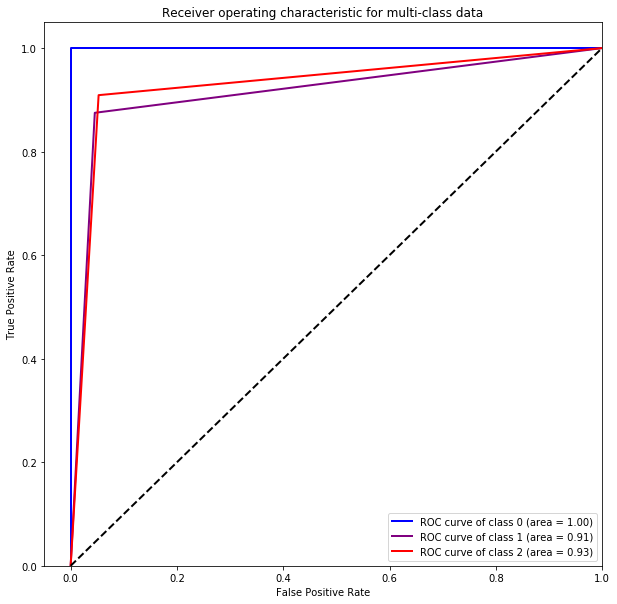

'class 0:Iris-setosa','class 1:Iris-versicolor','class 2:Iris-virginica'


In [111]:
plt.figure(figsize=(10,10))
Y_train_bin = label_binarize(Y_train, classes=[0,1,2])
Y_test_bin= label_binarize(Y_test, classes=[0,1,2])
n_classes = 3 #since we have three class

classifier = OneVsRestClassifier(DecisionTreeClassifier(random_state=0))
Y_score = classifier.fit(X_train, Y_train_bin).predict_proba(X_test)
classification_report_actual = classification_report(Y_test_bin, Y_score)
print("\033[1m" +"CLASSIFICATION REPORT"+"\033[0m")
print("\033[1m"+classification_report_actual, sep ='\n'+"\033[0m")

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(Y_test_bin[:, i], Y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
colors = cycle(['blue', 'purple', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--',lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()
print("\033[1m" +"'class 0:Iris-setosa','class 1:Iris-versicolor','class 2:Iris-virginica'" + "\033[0m")


### SO WE CAN SEE THE AREA IS HIGHEST FOR CLASS 0 MEANS CLASS 0 WAS EASILY CLASSIFIED BY OUR CLASSIFIER. FOR CLASS 1 THE AREA IS LOWEST MEANS CLASS 1 WAS NOT EASILY CLASSIFIED BY OUR CLASSIFIER.
### YOU CAN READ ABOVE MULTI-CLASS AUC FROM ONLINE SOURCES.

# THE END
# THANK YOU FOR WATCHING
# I HOPE YOU LIKE IT AND I AM ALWAYS OPEN FOR QUESTIONS AND SUGGESTIONS (: